#### Module Task 1

Sprocket Central Pty Ltd , a medium size bikes & cycling accessories organisation, has approached Tony Smith (Partner) in KPMG’s Lighthouse & Innovation Team. Sprocket Central Pty Ltd  is keen to learn more about KPMG’s expertise in its Analytics, Information & Modelling team. Smith discusses KPMG’s expertise in this space (you can read more here). In particular, he speaks about how the team can effectively analyse the datasets to help Sprocket Central Pty Ltd grow its business.Primarily, Sprocket Central Pty Ltd needs help with its customer and transactions data. The organisation has a large dataset relating to its customers, but their team is unsure how to effectively analyse it to help optimise its marketing strategy. 

The client provided KPMG with 3 datasets:

- Customer Demographic 
- Customer Addresses
- Transactions data in the past 3 months

You decide to start the preliminary data exploration and identify ways to improve the quality of Sprocket Central Pty Ltd’s data.

Objective : To assess the quality of their data; as well as make recommendations on ways to clean the underlying data and mitigate these issues.

In [1]:
# Import basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Exploring the Transactions dataset

In [2]:
# Load the dataset

transactions_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', 
                        sheet_name='Transactions', header=1)
transactions_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


#### Analyzing 'Transactions' dataset

In [3]:
#Check the dataset shape 

print('Shape of dataset is {}'.format(transactions_df.shape))

Shape of dataset is (20000, 13)


In [4]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

**Observations:**

1. There are 13 columns with 20000 rows, with int64, datetime64, float64 and object data types.
2. We need to convert 'product_first_sold_date' to datetime format
3. We do have missing values, no columns to be dropped, we will replace the missing values.

In [5]:
# Convert to datetime

from datetime import datetime,date
transactions_df['product_first_sold_date'] =pd.to_datetime(transactions_df['product_first_sold_date'],unit='s')

In [6]:
#Check for duplicates

transactions_df.duplicated().sum()

0

In [7]:
transactions_df.describe().drop('count', axis=0).drop(['transaction_id','product_id','customer_id'], axis=1)

,online_order,list_price,standard_cost
mean,0.500458,1107.829449,556.046951
std,0.500013,582.825242,405.955660
min,0.000000,12.010000,7.210000
25%,0.000000,575.270000,215.140000
50%,1.000000,1163.890000,507.580000
75%,1.000000,1635.300000,795.100000
max,1.000000,2091.470000,1759.850000


**Observations**
1. Min list_price is 12, while min standard_cost is 7.2
2. Max list_price is 2091.47 while max standard_cost is 1759.85
3. Most of the orders are online orders, 1 denotes online while 0 is not.

In [8]:
transactions_df.describe(include='object').drop('count', axis=0)

,order_status,brand,product_line,product_class,product_size
unique,2,6,4,3,3
top,Approved,Solex,Standard,medium,medium
freq,19821,4253,14176,13826,12990


**Observations**
1. Out of 20000 orders, 19821 orders were approved.
2. The top brand is Solex
3. Most sold: size - medium, for standard use and medium class

In [9]:
transactions_df.describe().drop('count', axis=0)

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000


In [10]:
# Handling the missing values:

round(transactions_df.isna().sum()/len(transactions_df),3)*100

transaction_id             0.0
product_id                 0.0
customer_id                0.0
transaction_date           0.0
online_order               1.8
order_status               0.0
brand                      1.0
product_line               1.0
product_class              1.0
product_size               1.0
list_price                 0.0
standard_cost              1.0
product_first_sold_date    1.0
dtype: float64

**Since the missing values are less than 1 percent, we will fill those values either with mode or other missing value handling techniques like KNN or so.** 

In [ ]:
# 

In [11]:
def value_counts (df):
    for col in df.columns:
        print("{}\n".format(df[col].value_counts()))

In [12]:
value_counts(transactions_df)

1        1
13331    1
13338    1
13337    1
13336    1
        ..
6667     1
6666     1
6665     1
6664     1
20000    1
Name: transaction_id, Length: 20000, dtype: int64

0      1378
3       354
1       311
35      268
38      267
       ... 
71      137
8       136
16      136
100     130
47      121
Name: product_id, Length: 101, dtype: int64

2183    14
2476    14
1068    14
1672    13
2912    13
        ..
898      1
2352     1
1846     1
3279     1
1757     1
Name: customer_id, Length: 3494, dtype: int64

2017-02-14    82
2017-08-18    82
2017-10-15    76
2017-01-31    73
2017-12-19    71
              ..
2017-01-12    38
2017-12-07    37
2017-03-29    36
2017-09-25    35
2017-10-19    32
Name: transaction_date, Length: 364, dtype: int64

1.0    9829
0.0    9811
Name: online_order, dtype: int64

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990


<AxesSubplot:xlabel='count', ylabel='product_size'>

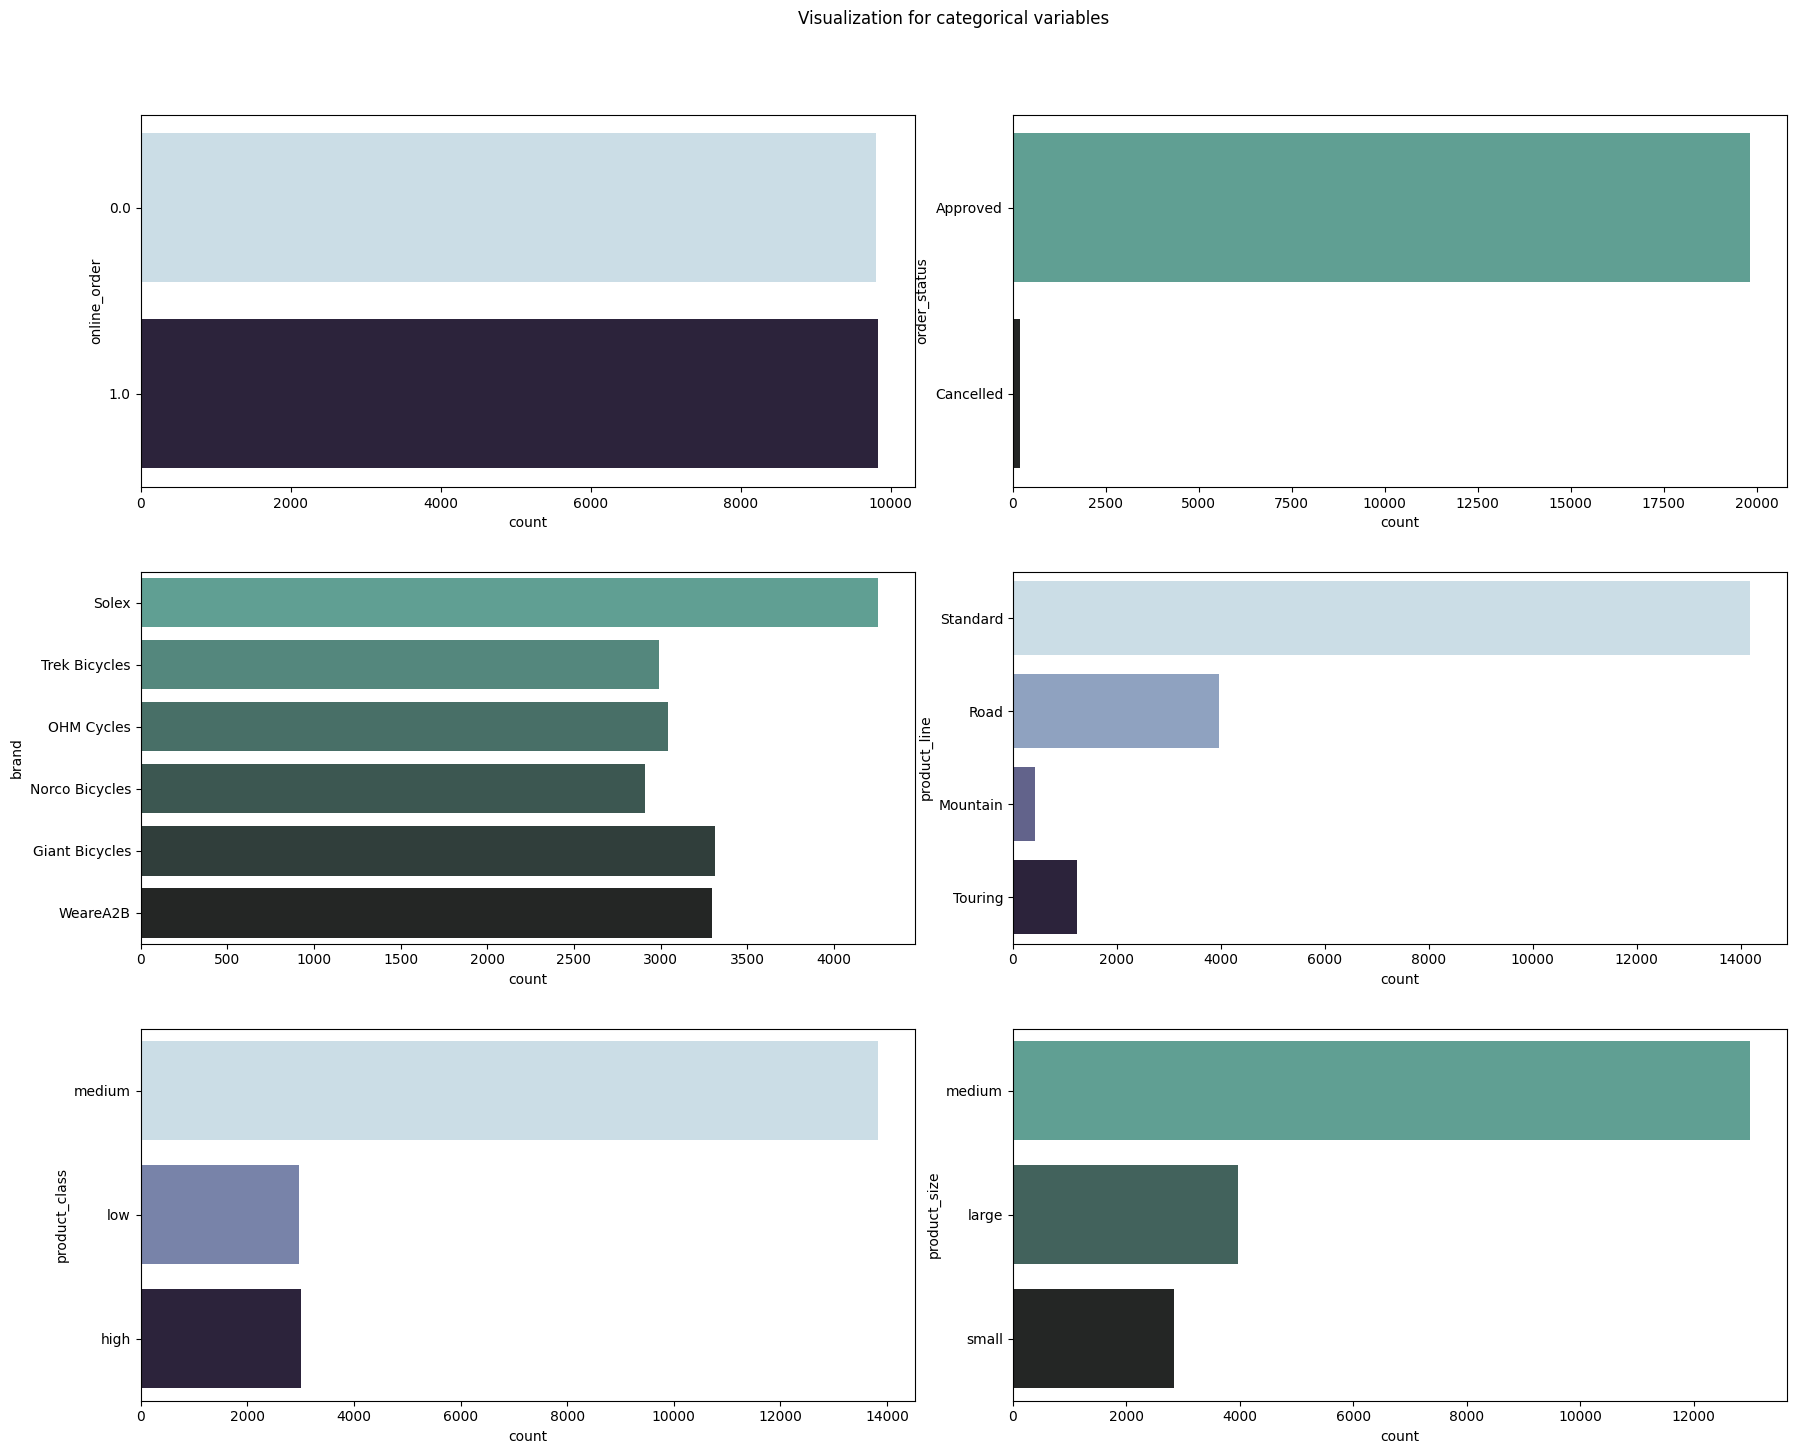

In [13]:
#Lets plot graphs for categorical data type

fig, axes = plt.subplots(3,2)
fig.suptitle('Visualization for categorical variables')
plt.gcf().set_size_inches(18, 15)
fig.tight_layout(pad=4.0)

sns.countplot(ax=axes[0,0], y = transactions_df['online_order'], data=transactions_df, palette='ch:s=.25,rot=-.25')
sns.countplot(ax=axes[0,1], y = transactions_df['order_status'],data=transactions_df, palette="dark:#5A9_r")
sns.countplot(ax=axes[1,0], y = transactions_df['brand'],data=transactions_df, palette="dark:#5A9_r")
sns.countplot(ax=axes[1,1], y = transactions_df['product_line'],data=transactions_df,palette="ch:s=.25,rot=-.25")
sns.countplot(ax=axes[2,0], y = transactions_df['product_class'],data=transactions_df,palette="ch:s=.25,rot=-.25")
sns.countplot(ax=axes[2,1], y = transactions_df['product_size'],data=transactions_df,palette="dark:#5A9_r")

#### Customer Demographic dataset

In [14]:
# Load the dataset

cust_demo_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', 
                        sheet_name='CustomerDemographic', header=1)
cust_demo_df.head()

C:\Users\Nima\AppData\Local\Temp\ipykernel_28256\4088483830.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  cust_demo_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellshock2.fail; },No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


#### Analyzing 'CustomerDemographic' dataset

In [15]:
#Check the dataset shape 

print('Shape of dataset is {}'.format(cust_demo_df.shape))

Shape of dataset is (4000, 13)


In [16]:
cust_demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

**Observations**
1. There are 4000 rows with 13 columns, data types are datetime, float, int and object.
2. There are some missing values, will be further investigated later on.
3. We can probably derive age out of 'DOB' column

In [17]:
# Overview of the missing values:

round((cust_demo_df.isna().sum()/len(cust_demo_df)*100),2)

customer_id                             0.00
first_name                              0.00
last_name                               3.12
gender                                  0.00
past_3_years_bike_related_purchases     0.00
DOB                                     2.17
job_title                              12.65
job_industry_category                  16.40
wealth_segment                          0.00
deceased_indicator                      0.00
default                                 7.55
owns_car                                0.00
tenure                                  2.17
dtype: float64

In [18]:
#Check for duplicates

cust_demo_df.duplicated().sum()

0

In [19]:
cust_demo_df.describe(include='object').drop(['first_name', 'last_name'], axis=1).drop('count', axis=0)

,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car
unique,6,195,9,3,2,90,2
top,Female,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100,Yes
freq,2037,45,799,2000,3998,113,2024


**Observations**
1. We need to replace the values int the gender column as there should be 'female' or 'male', not 6 unique values.
2. There are 195 different job title in the customer database, with 'Business Systems Development Analyst' being the highly occuring job title.
3. 9 Job industry categories, 'Manufacturing' being the most occuring.
4. The 'wealth segment', 'deceased_indicator','default'and 'owns-car' columsn should be further investigated.

In [20]:
# Create "age" column
 
# This function converts given date to age

def age(born):
    born = pd.to_datetime(born)
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
   
cust_demo_df['age'] = cust_demo_df['DOB'].apply(age)

In [21]:
cust_demo_df.drop('DOB',axis=1, inplace=True)

In [22]:

cust_demo_df['age'] = cust_demo_df['age'].fillna(cust_demo_df['age'].mode()[0])
cust_demo_df['age'] = cust_demo_df['age'].astype(int) 
cust_demo_df.sample(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age
2185,2186,Carolina,Sexty,Female,61,Clinical Specialist,Health,High Net Worth,N,ï½ï½¨(Â´âï½â©,No,5.0,59
3877,3878,Waldon,Digges,Male,99,Programmer III,NaN,Mass Customer,N,ï¾ï½¥â¿ã¾â²(ï½¡ââ¿âï½¡)â±â¿ï½¥ï¾,No,9.0,44


In [23]:
value_counts(cust_demo_df)

1       1
2672    1
2659    1
2660    1
2661    1
       ..
1339    1
1340    1
1341    1
1342    1
4000    1
Name: customer_id, Length: 4000, dtype: int64

Max         5
Tobe        5
Timmie      5
Kippy       4
Pail        4
           ..
Katy        1
Hakim       1
Fanchon     1
Jeanette    1
Sarene      1
Name: first_name, Length: 3139, dtype: int64

Pristnor     3
Ramsdell     3
Eager        2
Zisneros     2
Dredge       2
            ..
Whittock     1
Carwithen    1
Blas         1
Dearlove     1
Oldland      1
Name: last_name, Length: 3725, dtype: int64

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

16    56
19    56
67    54
20    54
2     50
      ..
8     28
95    27
85    27
86    27
92    24
Name: past_3_years_bike_related_purchases, Length: 100, dtype: int64

Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor 

**Observations**
1. In the 'gender' column, there is data inconsistency, we will change 'female' to 'F', 'femal' to 'F', 'Male' to 'M'.
2. Further clarification on 'wealth segment' and 'default' columns are needed
3. Something is off in the 'age' column,there is value of 179 which must be handled as well.

In [24]:
# Standardizing the values in 'gender' column
cust_demo_df['gender'].isna().sum()

0

In [25]:
cust_demo_df['gender']=cust_demo_df['gender'].replace({'Female':'F','Femal':'F', 'Male':'M'})
cust_demo_df['gender'].value_counts()

F    2039
M    1873
U      88
Name: gender, dtype: int64

In [26]:
# Handling the incorrect age value
cust_demo_df.loc[cust_demo_df['age'] == 179]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age
33,34,Jephthah,Bachmann,U,59,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0,179


In [27]:
# Assuming the year was incorrectly typed in, thus the year has been changed from 1844 to 1944
cust_demo_df.loc[cust_demo_df['age'] == 179] = cust_demo_df.loc[cust_demo_df['age'] == 179].replace({179:79})
cust_demo_df.loc[cust_demo_df['age'] == 79]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age
33,34,Jephthah,Bachmann,U,59,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0,79
2412,2413,Abbey,Murrow,M,27,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0,79


<AxesSubplot:xlabel='count', ylabel='owns_car'>

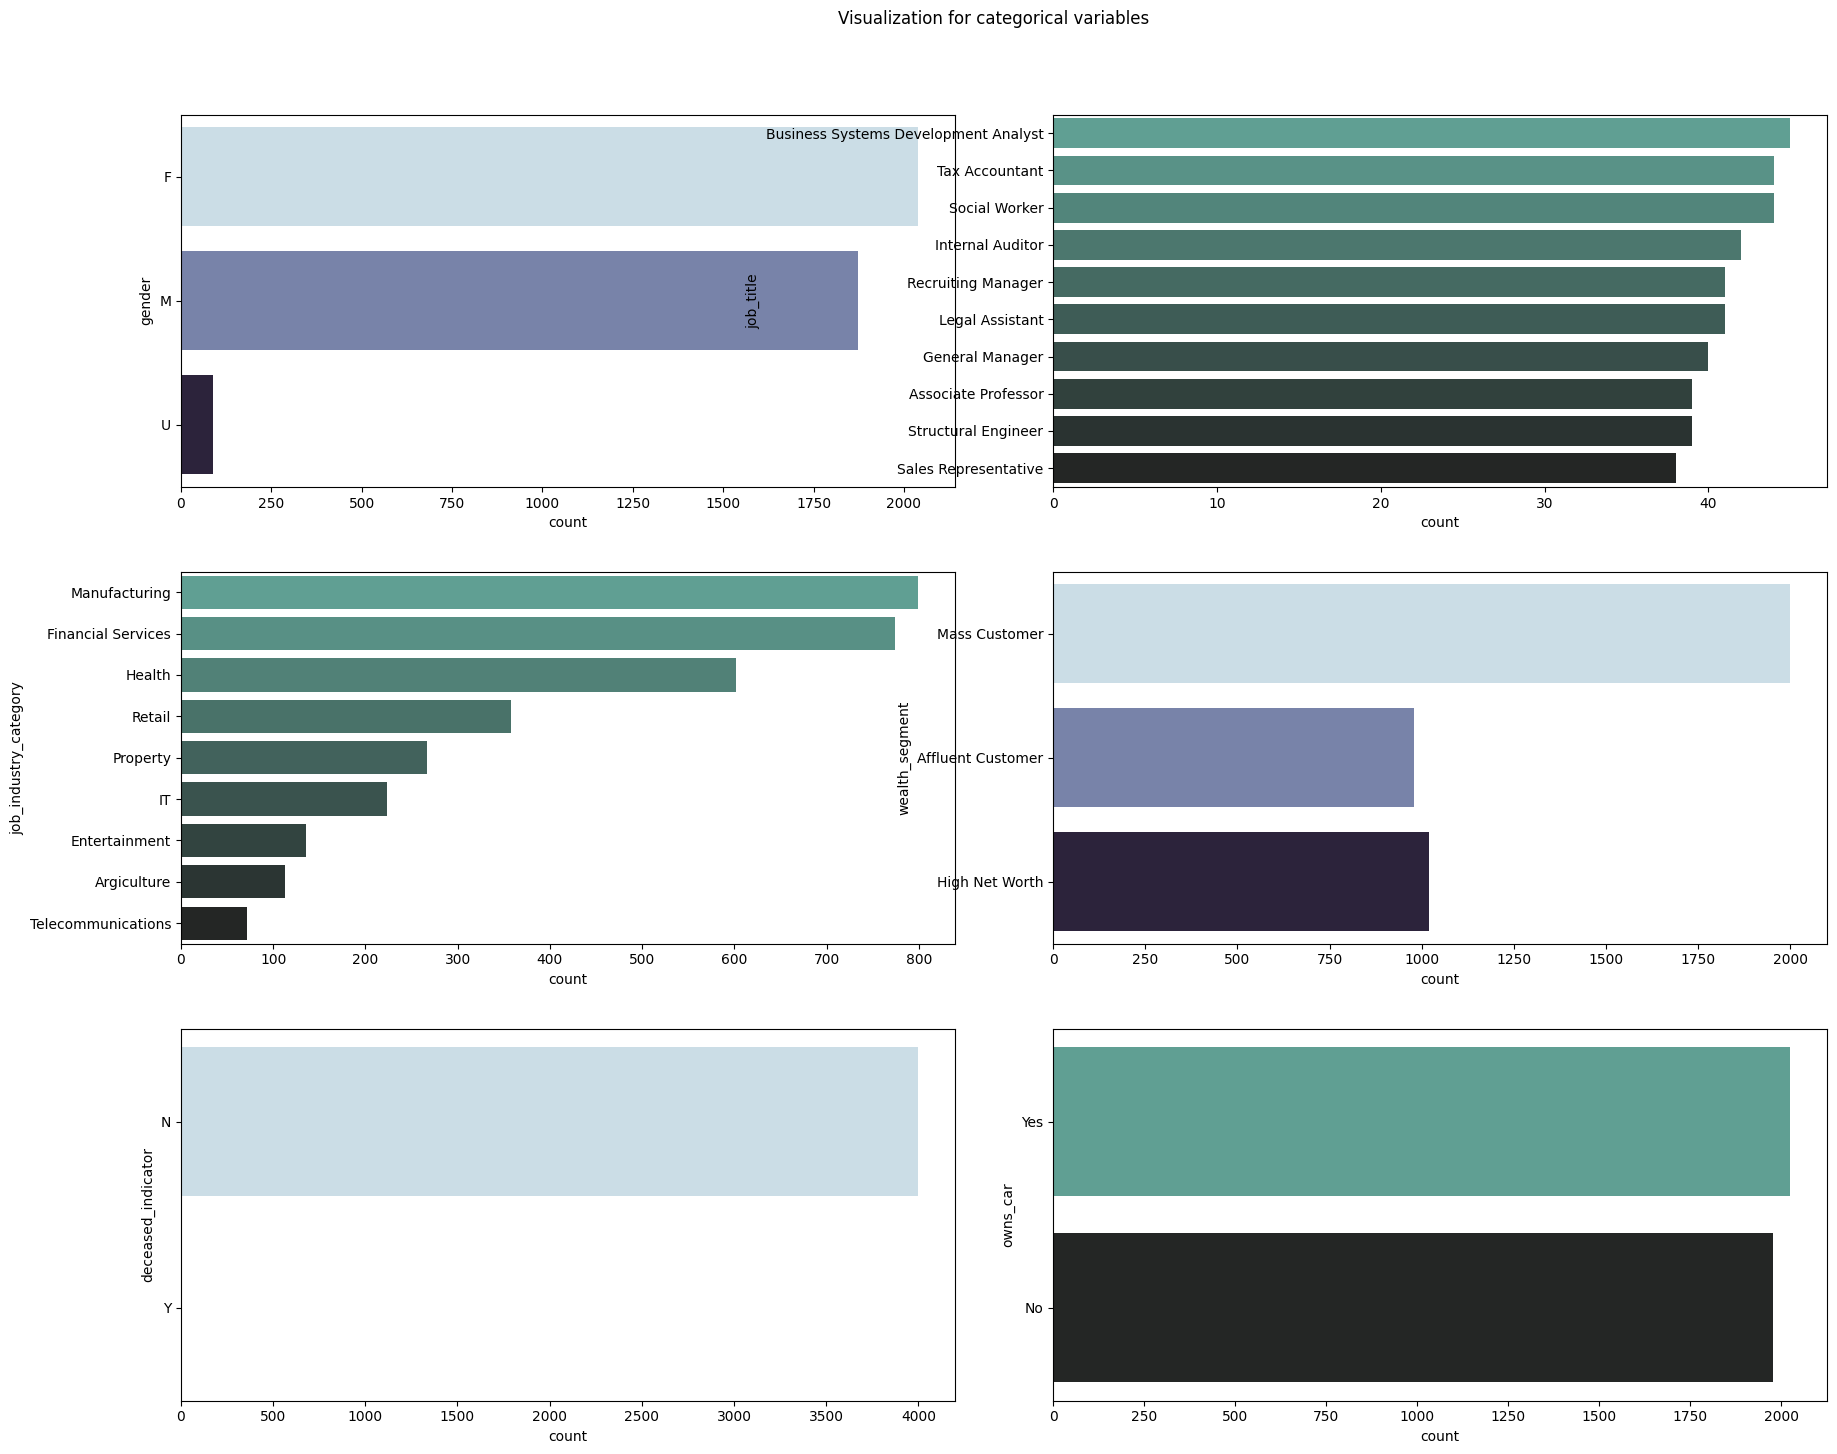

In [28]:
#Lets plot graphs for categorical data type

fig, axes = plt.subplots(3,2)
fig.suptitle('Visualization for categorical variables')
plt.gcf().set_size_inches(18, 15)
fig.tight_layout(pad=4.0)

sns.countplot(ax=axes[0,0], y = cust_demo_df['gender'], data=cust_demo_df, palette='ch:s=.25,rot=-.25')
sns.countplot(ax=axes[0,1], y = cust_demo_df['job_title'],data=cust_demo_df,order=cust_demo_df.job_title.value_counts().iloc[:10].index,palette="dark:#5A9_r")
sns.countplot(ax=axes[1,0], y = cust_demo_df['job_industry_category'],data=cust_demo_df,order=cust_demo_df.job_industry_category.value_counts().iloc[:10].index,palette="dark:#5A9_r")
sns.countplot(ax=axes[1,1], y = cust_demo_df['wealth_segment'],data=cust_demo_df,palette="ch:s=.25,rot=-.25")
sns.countplot(ax=axes[2,0], y = cust_demo_df['deceased_indicator'],data=cust_demo_df,palette="ch:s=.25,rot=-.25")
sns.countplot(ax=axes[2,1], y = cust_demo_df['owns_car'],data=cust_demo_df,palette="dark:#5A9_r")


#### Customer Address Dataset

In [29]:
# Load the dataset

cust_add_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', 
                        sheet_name='CustomerAddress', header=1)
cust_add_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [30]:
#### Analyzing Customer Address dataset

In [31]:
#Check the dataset shape 

print('Shape of dataset is {}'.format(cust_add_df.shape))

Shape of dataset is (3999, 6)


In [32]:
cust_add_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


**Observations**
1. There are 6 columns, with 3999 entries with data types = int and object
2. No missing values.

In [33]:
#Check for duplicates

cust_add_df.duplicated().sum()

0

In [34]:
cust_add_df.describe(include='object').drop(['address'], axis=1).drop('count', axis=0)

,state,country
unique,5,1
top,NSW,Australia
freq,2054,3999


In [35]:
value_counts(cust_add_df)

1       1
2676    1
2663    1
2664    1
2665    1
       ..
1343    1
1344    1
1345    1
1346    1
4003    1
Name: customer_id, Length: 3999, dtype: int64

3 Mariners Cove Terrace      2
3 Talisman Place             2
64 Macpherson Junction       2
359 Briar Crest Road         1
4543 Service Terrace         1
                            ..
5063 Shopko Pass             1
09 Hagan Pass                1
87897 Lighthouse Bay Pass    1
294 Lawn Junction            1
320 Acker Drive              1
Name: address, Length: 3996, dtype: int64

2170    31
2155    30
2145    30
2153    29
3977    26
        ..
3808     1
3114     1
4721     1
4799     1
3089     1
Name: postcode, Length: 873, dtype: int64

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

Australia    3999
Name: country, dtype: int64

9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1

In [36]:
cust_add_df['state']=cust_add_df['state'].replace({'NSW':'New South Wales','VIC':'Victoria', 'QLD':'Queensland'})
cust_add_df['state'].value_counts()

New South Wales    2140
Victoria           1021
Queensland          838
Name: state, dtype: int64

#### New Customer List dataset

In [37]:
# Load the dataset

new_cust_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', 
                        sheet_name='NewCustomerList', header=1)
new_cust_df.head()

C:\Users\Nima\AppData\Local\Temp\ipykernel_28256\3719896691.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  new_cust_df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


**Analyzing NewCustomerList dataset**

In [38]:
#Check the dataset shape 

print('Shape of dataset is {}'.format(new_cust_df.shape))

Shape of dataset is (1000, 23)


In [39]:
new_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

**Observations**
1. There are 1000 rows with 22 columns with datetime, float, int and object as datatypes.
2. The are some missing values. Ways to handle missing should be further investigated.
3. There are some unnamed columns, will be dropped if not important.
4. Age can be derived from the DOB column.

In [40]:
# Overview of  the missing values:
nulls_df = round((new_cust_df.isna().sum()/len(new_cust_df)*100),2)
nulls_df[nulls_df>0]

last_name                 2.9
DOB                       1.7
job_title                10.6
job_industry_category    16.5
dtype: float64

In [41]:
def nulls(df):
    for col in df.columns:
        new_df = round((df[col].isna().sum()/len(new_cust_df)*100),2)
        print("{}:{}%".format(col,new_df))

In [42]:
nulls(new_cust_df)

first_name:0.0%
last_name:2.9%
gender:0.0%
past_3_years_bike_related_purchases:0.0%
DOB:1.7%
job_title:10.6%
job_industry_category:16.5%
wealth_segment:0.0%
deceased_indicator:0.0%
owns_car:0.0%
tenure:0.0%
address:0.0%
postcode:0.0%
state:0.0%
country:0.0%
property_valuation:0.0%
Unnamed: 16:0.0%
Unnamed: 17:0.0%
Unnamed: 18:0.0%
Unnamed: 19:0.0%
Unnamed: 20:0.0%
Rank:0.0%
Value:0.0%


In [43]:
#Check for duplicates

new_cust_df.duplicated().sum()

0

In [44]:
new_cust_df.describe(include='object').drop('count', axis=0)

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,state,country
unique,940,961,3,184,9,3,1,2,1000,3,1
top,Rozamond,Sissel,Female,Associate Professor,Financial Services,Mass Customer,N,No,45 Shopko Center,NSW,Australia
freq,3,2,513,15,203,508,1000,507,1,506,1000


**Observations**
1. We need to replace the values int the gender column to match the previous dataset.
2. There are 184 different job title in the customer database, with 'Associate Professor' being the highly occuring job title.
3. 9 Job industry categories, 'Financial Services' being the most occuring.
4. The 'wealth segment', 'deceased_indicator','default'and 'owns-car' columsn should be further investigated.

In [45]:
value_counts(new_cust_df)

Rozamond     3
Dorian       3
Mandie       3
Inglebert    2
Ricki        2
            ..
Diego        1
Lucilia      1
Eddy         1
Caron        1
Sylas        1
Name: first_name, Length: 940, dtype: int64

Sissel       2
Minshall     2
Borsi        2
Shoesmith    2
Sturch       2
            ..
O'Moylane    1
Axtens       1
Moxted       1
Conrad       1
Duffill      1
Name: last_name, Length: 961, dtype: int64

Female    513
Male      470
U          17
Name: gender, dtype: int64

60    20
59    18
42    17
70    17
11    16
      ..
19     5
9      5
92     5
85     4
20     3
Name: past_3_years_bike_related_purchases, Length: 100, dtype: int64

1998-02-05    2
1978-01-15    2
1977-11-08    2
1951-11-28    2
1979-07-28    2
             ..
1945-08-08    1
1943-08-27    1
1999-10-24    1
1976-01-24    1
1955-10-02    1
Name: DOB, Length: 958, dtype: int64

Associate Professor         15
Environmental Tech          14
Software Consultant         14
Chief Design Engineer       13
Assi

In [46]:
new_cust_df['gender']=new_cust_df['gender'].replace({'Female':'F', 'Male':'M'})
new_cust_df['gender'].value_counts()

F    513
M    470
U     17
Name: gender, dtype: int64

In [47]:
new_cust_df['state']=new_cust_df['state'].replace({'NSW':'New South Wales','VIC':'Victoria', 'QLD':'Queensland'})
new_cust_df['state'].value_counts()

New South Wales    506
Victoria           266
Queensland         228
Name: state, dtype: int64

In [48]:
new_cust_df['age'] = new_cust_df['DOB'].apply(age)

In [49]:
new_cust_df.drop('DOB',axis=1, inplace=True)

In [50]:
# dropping the 'unnamed' columns

new_cust_df.drop(columns=['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'], axis=1, inplace=True)

In [51]:
new_cust_df.sample(2)

,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age
549,Beverlee,Querree,F,42,Marketing Manager,Financial Services,High Net Worth,N,Yes,12,891 Ohio Terrace,2075,New South Wales,Australia,12,549,0.82000,31.0
432,Arel,Abramovitz,M,72,Nurse Practicioner,Health,Mass Customer,N,No,16,32249 Sycamore Way,4650,Queensland,Australia,4,433,0.90625,65.0


In [52]:
new_cust_df.to_csv('new_cust_df')

#### Merging dataset

In [53]:
# Merge dataframes using the customer_id column
final_df = pd.merge(transactions_df,cust_demo_df, how='left', on='customer_id')
final_df.drop('default', axis=1,inplace=True)

In [54]:
df = pd.merge(final_df,cust_add_df, how='left', on='customer_id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       20000 non-null  int64         
 1   product_id                           20000 non-null  int64         
 2   customer_id                          20000 non-null  int64         
 3   transaction_date                     20000 non-null  datetime64[ns]
 4   online_order                         19640 non-null  float64       
 5   order_status                         20000 non-null  object        
 6   brand                                19803 non-null  object        
 7   product_line                         19803 non-null  object        
 8   product_class                        19803 non-null  object        
 9   product_size                         19803 non-null  object        
 10  list_price

In [55]:
df.to_csv('merged_df.csv')